# Análisis de datos con sistema inteligentes

Dentro de la big data. El análisis de datos es esencial para poder predecir y tomar decisiones dependiendo de la gran cantidad de datos.

Teniendo esto en cuenta. En el presente notebook vamos a conectarnos con una IA, le vamos a pasar una base de datos fake con una gran cantidad de datos y se la pasaremos a al modelo para que este realice el análisis de este.

## Creacion de la base de datos
Lo primero que necesitaremos es una base de datos la cual se la pasaremos al modelo para que realice el respectivo análisis de estos. Para ello pensemos en un tema en particular que aunque muchos no lo ven nos afecta de igual manera a todos. Este es los ciberataques. Al utilizar aplicaciones en internet se exponen muchos datos que a pesar no lo notamos se dan desde el navegador. Tambien cuando entramos a paginas web, iniciamos sesión, etc. Nuestros datos son tratados con las politicas de seguridad de los dueños de estas. Estos datos literalmente es oro para los atacantes que no escatiman recursos y tiempo para poder acceder a estos. 

Teniendo esto en cuenta. Con el siguiente fragmento de código generaremos una base de datos aleatoriamente para que la IA nos la analice y nos ayude a entender un poco más acerca de este tema.

In [10]:
import pandas as pd
import random
import datetime

# Definir los datos posibles
tipos_ataque = ["Phishing", "Ransomware", "DDoS", "Malware", "Ingeniería Social"]
paises = ["EE.UU.", "China", "Rusia", "Alemania", "Brasil", "India", "Reino Unido", "Francia", "Japón", "Colombia"]
impactos = ["Bajo", "Medio", "Alto", "Crítico"]

# Generar la información
data = {
    "ID": list(range(1, 5001)),  # 100 registros
    "Tipo de Ataque": [random.choice(tipos_ataque) for _ in range(5000)],
    "País Afectado": [random.choice(paises) for _ in range(5000)],
    "Fecha": [(datetime.datetime.now() - datetime.timedelta(days=random.randint(1, 5000))).strftime("%Y-%m-%d") for _ in range(5000)],
    "Impacto": [random.choice(impactos) for _ in range(5000)]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print(df.head())

   ID     Tipo de Ataque País Afectado       Fecha Impacto
0   1  Ingeniería Social         Rusia  2014-07-11    Alto
1   2  Ingeniería Social      Colombia  2015-06-24    Bajo
2   3  Ingeniería Social      Alemania  2017-10-16    Alto
3   4           Phishing         China  2021-07-05   Medio
4   5         Ransomware       Francia  2019-07-08   Medio


In [17]:
!pip install tabulate
import os
import openai

apiKey = os.environ["GITHUB_TOKEN"]

client = openai.OpenAI(base_url="https://models.inference.ai.azure.com", api_key=apiKey)
modelName = "gpt-4o"

messages = [
    {
        "role": "system",
        "content": (
            "Eres un asistente experto en análisis de datos con Python y pandas. "
            "Vas a trabajar con un DataFrame que tiene miles de filas y múltiples columnas. "
            "Para no saturar la salida, nunca muestres el DataFrame completo, "
            "sino que debes:\n"
            "1. Describir la estructura (df.info()).\n"
            "2. Mostrar estadísticas resumidas (df.describe()).\n"
            "3. Identificar valores faltantes y tipos de datos.\n"
            "4. Proponer y ejecutar filtrados o agrupaciones según lo solicite el usuario.\n"
            "Cuando respondas, incluye únicamente el fragmento de código pandas "
            "necesario y una breve explicación de los resultados."
            f"Este es el data frame con el que trabajarás {df}"),
    },
]




while True:
    question = input("\nTu pregunta: ")
    print("Enviando pregunta...")

    messages.append({"role": "user", "content": question})
    response = client.chat.completions.create(
        model=modelName,
        messages=messages,
        temperature=1,
        max_tokens=400,
        top_p=0.95,
        frequency_penalty=0,
        presence_penalty=0,
        stop=None,
        stream=True
    )
    showModelResponse(response)

def showModelResponse(respose):
    print(f"Respuesta del modelo {modelName}: \n")
    for event in respose:
        if event.choices:
            content = event.choices[0].delta.content
            if content:
                print(content, end="", flush=True)


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip



Tu pregunta:   Dame un primer análisis de los datos.


Enviando pregunta...
Respuesta del modelo gpt-4o: 

Para un primer análisis de los datos, realizo lo siguiente:

### Código para describir la estructura del DataFrame:
```python
df.info()
```
**Explicación de resultados:** Este comando proporciona información sobre el DataFrame, como el número de filas, columnas, nombres de columnas, tipos de datos y cuántos valores no nulos hay en cada columna.

---

### Código para mostrar estadísticas descriptivas:
```python
df.describe(include='all')
```
**Explicación de resultados:** Este comando genera estadísticas resumidas, como el conteo, la media, la desviación estándar, valores únicos, valores más frecuentes, entre otros, para columnas numéricas y categóricas.

---

### Código para identificar valores faltantes:
```python
df.isnull().sum()
```
**Explicación de resultados:** Este comando muestra el número total de valores faltantes por columna, lo que permite evaluar la calidad de los datos.

### Código para listar tipos de datos:
```python
d


Tu pregunta:  Si, me puedes ayudar a generar un grafico para agrupando por alguna de las columnas del data frame?


Enviando pregunta...
Respuesta del modelo gpt-4o: 

Claro, pero antes de generar el gráfico, vamos a realizar el primer análisis de los datos. Seguiré los pasos que mencioné antes:

1. **Describir la estructura del DataFrame:**
```python
df.info()
```
Esto mostrará información como el número total de filas, columnas, tipos de datos y valores no nulos.

2. **Mostrar estadísticas resumidas:**
```python
df.describe(include='all', datetime_is_numeric=True)
```
Esto te dará estadísticas como media, desviación estándar, valores únicos y los valores más frecuentes dependiendo del tipo de cada columna.

3. **Identificar valores faltantes y tipos de datos:**
```python
df.isnull().sum()
```
Esto mostrará cuántos valores faltantes hay en cada columna.

### Explicación del análisis:
- `df.info()` te permitirá confirmar si hay tipos de datos correctos y cuántos valores faltan en total.
- `df.describe()` te ayudará a comprender la distribución de los datos (en valores numéricos y categóricos).
- `df

KeyboardInterrupt: Interrupted by user

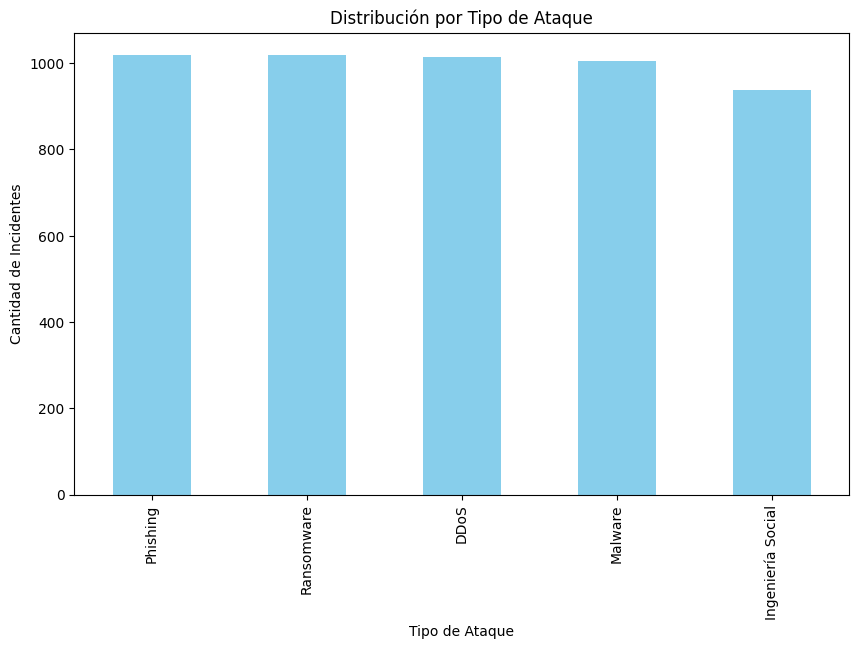

In [18]:
import matplotlib.pyplot as plt

df['Tipo de Ataque'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribución por Tipo de Ataque')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Cantidad de Incidentes')
plt.show()